In [19]:
# Install and load the necessary libraries
library(readr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6)

zip_file_path <- "census+income.zip"

extracted_dir <- "data/"

# Unzip the file
unzip(zip_file_path, exdir = extracted_dir)

# Read the adult.data file into a dataframe
adult_data_path <- file.path(extracted_dir, "adult.data")
adult_df <- read.table(adult_data_path, header = FALSE, sep = ",", quote = "\"")

# Add appropriate column names
colnames(adult_df) <- c('age','working_class','financial_weight','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hrs_per_week','native_country','income')

# Display the first few rows of the dataframe
head(adult_df)

,age,working_class,financial_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,income
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Creating test and train splits

In [20]:
# Create test and train splits
adult_split = initial_split(adult_df, prop = 0.50, strata = income)
adult_training = training(adult_split)
adult_testing = testing(adult_split)

Create summary tables

In [21]:
# Create a table summarizing the number of observations for each class in income, sex, race
summary_table <- adult_training |>
  group_by(income, sex, race) |>
  summarize(count = n())

# Display the summary table, print them for better readability
print("Summary Table:")
print(summary_table)

# Produce means for age, education_num, hours_per_week (vars we will likely use)
means_table <- adult_training |>
    group_by(income, sex, race) |>
    summarize(
        mean_age = mean(age),
        mean_education_num = mean(education_num),
        mean_hours_per_week = mean(hrs_per_week)
      )

print("Means Table:")
print(means_table)

# Find the number of rows with missing values
missing_rows_training <- adult_training %>%
  summarise_all(~sum(is.na(.)))

# Display the number of rows with missing values
print("Number of Rows with Missing Values:")
print(sum(missing_rows_training))

`summarise()` has grouped output by 'income', 'sex'. You can override using the
`.groups` argument.


[1] "Summary Table:"
# A tibble: 20 × 4
# Groups:   income, sex [4]
   income   sex       race                  count
   <chr>    <chr>     <chr>                 <int>
 1 " <=50K" " Female" " Amer-Indian-Eskimo"    50
 2 " <=50K" " Female" " Asian-Pac-Islander"   145
 3 " <=50K" " Female" " Black"                768
 4 " <=50K" " Female" " Other"                 54
 5 " <=50K" " Female" " White"               3799
 6 " <=50K" " Male"   " Amer-Indian-Eskimo"    87
 7 " <=50K" " Male"   " Asian-Pac-Islander"   241
 8 " <=50K" " Male"   " Black"                633
 9 " <=50K" " Male"   " Other"                 66
10 " <=50K" " Male"   " White"               6517
11 " >50K"  " Female" " Amer-Indian-Eskimo"     4
12 " >50K"  " Female" " Asian-Pac-Islander"    21
13 " >50K"  " Female" " Black"                 51
14 " >50K"  " Female" " Other"                  4
15 " >50K"  " Female" " White"                480
16 " >50K"  " Male"   " Amer-Indian-Eskimo"    13
17 " >50K"  " Male"   " Asian-Pa

`summarise()` has grouped output by 'income', 'sex'. You can override using the
`.groups` argument.


[1] "Means Table:"
# A tibble: 20 × 6
# Groups:   income, sex [4]
   income   sex       race       mean_age mean_education_num mean_hours_per_week
   <chr>    <chr>     <chr>         <dbl>              <dbl>               <dbl>
 1 " <=50K" " Female" " Amer-In…     39.3               9.52                35.6
 2 " <=50K" " Female" " Asian-P…     33.7              10.3                 37.0
 3 " <=50K" " Female" " Black"       37.6               9.41                36.4
 4 " <=50K" " Female" " Other"       31.8               7.89                34.6
 5 " <=50K" " Female" " White"       36.2               9.87                35.7
 6 " <=50K" " Male"   " Amer-In…     35.9               8.94                43.0
 7 " <=50K" " Male"   " Asian-P…     36.9              10.7                 39.2
 8 " <=50K" " Male"   " Black"       36.6               9.12                39.1
 9 " <=50K" " Male"   " Other"       33.0               8.47                44.0
10 " <=50K" " Male"   " White"       37.2  

Create bar plots

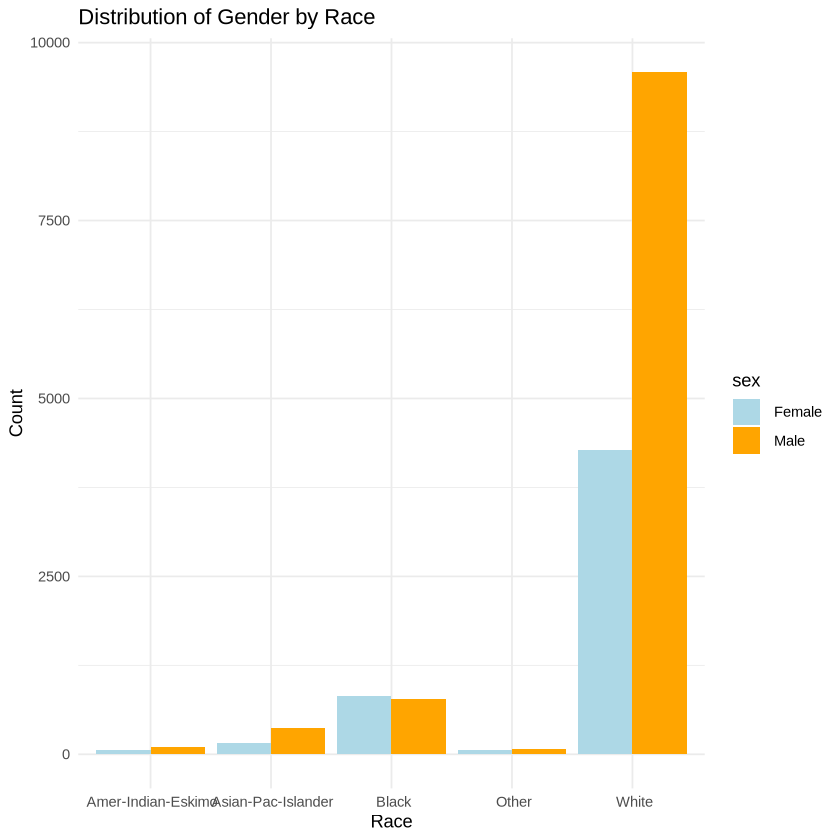

In [22]:
# Create a bar plot
gener_by_race_plot <- ggplot(adult_training, aes(x = race, fill = sex)) +
  geom_bar(position = "dodge", stat = "count") +
  labs(title = "Distribution of Gender by Race",
       x = "Race",
       y = "Count") +
  scale_fill_manual(values = c("lightblue", "orange")) +
  theme_minimal()

gener_by_race_plot